<a href="https://colab.research.google.com/github/Andres2580/Complejidad-Algoritmica-Clases/blob/main/Semana6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
def bfs(g,s):
    n = len(G)#el tamano de nuestro grafo
    visited = [False]*n #arreglo de visitados, poner falso a todos
    path = [-1]*n#no se sabe quien va ser los padres
    queue = [s]
    visited[s] = True

    while queue:
      #sacamos el primer elemento 0
        u =  queue.pop(0)# va ser el vertice que vamos a sacar de nuestra cola
        for v in range(n):
            if G[u,v] != 0 and not visited[v]:
                visited[v] = True
                path[v] = u
                queue.append(v)
    return path

In [7]:
def dfs(g,s):
    n = len(G)#el tamano de nuestro grafo
    visited = [False]*n #arreglo de visitados, poner falso a todos
    path = [-1]*n#no se sabe quien va ser los padres

    def f(u):
        visited[u] = True
        for v in range(n):
            if G[u,v] != 0 and not visited[v]:
                path[v] = u
                f(v)
    f(s)
    return path

In [ ]:
class Graph:
    def __init__(self):
        self._g = []# una lista
        self._labels = []
        self._names = []
        self.__name2idx = dict()
    #cuando agregamos un nodo
    def addNode(self, name, label = None):
        if label == None:
            label = name
        n = len(self._g)
        self._g.append([])
        self._names.append(name)
        self._labels.append(label)
        self.__name2idx[name]

In [ ]:
class Graph:

    def __init__(self):
        self._g = []# una lista
        self._labels = []
        self._names = []
        self.__name2idx = dict()
    #cuando agregamos un nodo
    def addNode(self, name, label = None):
        if label == None:
            label = name
        n = len(self._g)
        self._g.append([])
        self._names.append(name)
        self._labels.append(label)
        self.__name2idx[name]

Semana 6 -----------------------------------------

In [ ]:
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config

In [ ]:
!python -m pip install pygraphviz

In [25]:
import heapq
import graphviz as gv
import networkx as nx

In [26]:
#usando networkX
#Son los caminos que estamos creando
def dijkstra(G: nx.DiGraph, s):
    n = G.number_of_nodes()
    #toda la informacion por fuera
    visited = [False]*n#arr de visitados
    path = [-1]*n #arr de padres
    g = [float('inf')]*n #Costo
    pq = [] # cola de prioridad

    g[s] = 0 #la parte inicial q se ha mencionado
    heapq.heappush(pq,(0,s)) # distancia 0, vertice s

    while pq: # no este vacia, vamos a extraer
    #extraigo 2 parametros
        _, u = heapq.heappop(pq)
        visited[u] = True
        for v in G.neighbors(u):
            if not visited[v]:
                w = G.edges[u,v]['weight']
                if g[u] + w < g[v]:
                    g[v] = g[u] + w
                    path[v] = u
                    heapq.heappush(pq, (g[v], v))

    return path,g




##Pure networkx

In [28]:
#usando networkX
#Nos permite agregar informacion adicional arbitraria a cada uno de nuestros nodos
def dijkstraNX(G: nx.DiGraph, s):
    for u in G.nodes:
        G.nodes[u]['visited'] = False
        G.nodes[u]['path'] = -1
        G.nodes[u]['g'] = float('inf')


    pq = [] # cola de prioridad
    G.nodes[s]['g'] = 0
    heapq.heappush(pq,(0,s)) # distancia 0, vertice s

    while pq: # no este vacia, vamos a extraer
    #extraigo 2 parametros
        _, u = heapq.heappop(pq)
        G.nodes[u]['visited'] = True
        for v in G.neighbors(u):
            if not G.nodes[v]['visited']:
                w = G.edges[u,v]['weight']
                if G.nodes[u]['g'] + w < G.nodes[v]['g']:
                    G.nodes[v]['g'] = G.nodes[u]['g'] + w
                    G.nodes[v]['path'] = u
                    heapq.heappush(pq, (G.nodes[v]['g'], v))

    path = [-1 if u == s else G.nodes[u]['path'] for u in G.nodes]
    g = [G.nodes[u]['g'] for u in G.nodes]

    return path,g

##dijkstraAL (Lista de Adyacencia)

In [29]:
#Utilizo una representacion basica
#Lista de Adjacencia
def dijkstraAL(G: list, s):
    n = len(G)
    visited = [False]*n#arr de visitados
    path = [-1]*n #arr de padres
    g = [float('inf')]*n #Costo
    pq = [] # cola de prioridad
    g[s] = 0 #la parte inicial q se ha mencionado
    heapq.heappush(pq,(0,s)) # distancia 0, vertice s

    while pq: # no este vacia, vamos a extraer
    #extraigo 2 parametros
        _, u = heapq.heappop(pq)
        visited[u] = True
        for v, w in G[u]:
                if not visited[v] and g[u] + w < g[v]:
                    g[v] = g[u] + w
                    path[v] = u
                    heapq.heappush(pq, (g[v], v))

    return path,g

In [30]:
%%file 1.csv
#u, v, w vertice, arista, peso
0,2,6
0,3,9
1,0,3
1,3,8
1,5,9
3,5,8
5,6,7
5,7,7
6,4,4
7,4,6

Overwriting 1.csv


In [16]:
G = nx.read_weighted_edgelist('1.csv', create_using=nx.DiGraph, delimiter=',', nodetype=int)
print(G)

DiGraph with 8 nodes and 10 edges


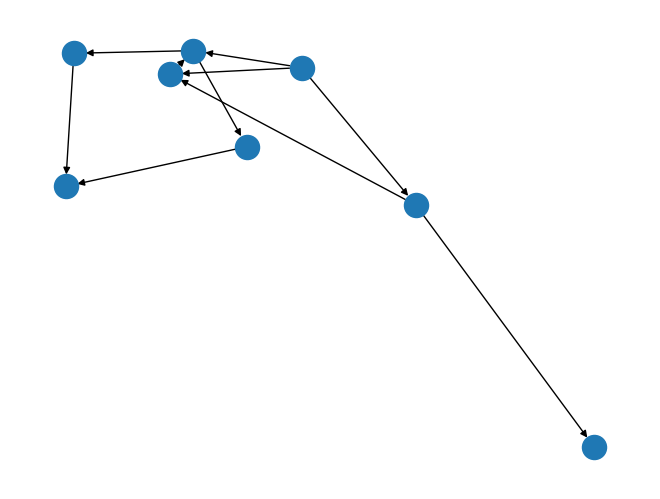

In [15]:
G = nx.read_weighted_edgelist('1.csv', create_using=nx.DiGraph, delimiter=',', nodetype=int)
nx.draw(G)

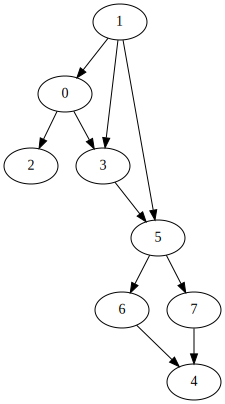

In [31]:
G = nx.read_weighted_edgelist('1.csv', create_using=nx.DiGraph, delimiter=',', nodetype=int)
#A = nx.nx_agraph.to_agraph(G)
gv.Source(nx.nx_agraph.to_agraph(G).string())

In [32]:
dijkstra(G, 1)

([1, -1, 0, 1, 6, 1, 5, 5], [3.0, 0, 9.0, 8.0, 20.0, 9.0, 16.0, 16.0])

In [33]:
dijkstraNX(G, 1)

([1, 0, 1, -1, 1, 5, 5, 6], [3.0, 9.0, 8.0, 0, 9.0, 16.0, 16.0, 20.0])

In [34]:
with open('1.csv') as f:
    G = []
    for line in f:
        if line.startswith('#'):
            continue
        u, v, w = [int(x) for x in line.split(',')]
        if len(G) < max(u,v):
            for i in range(len(G), max(u,v)+1):
                G.append([])
        G[u].append((v,w))
    print(G)

[[(2, 6), (3, 9)], [(0, 3), (3, 8), (5, 9)], [], [(5, 8)], [], [(6, 7), (7, 7)], [(4, 4)], [(4, 6)]]


In [35]:
dijkstraAL(G,1)

([1, -1, 0, 1, 6, 1, 5, 5], [3, 0, 9, 8, 20, 9, 16, 16])